## Decision Tree Programming Assignment
### Enrico Absin

vendor    0
model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64


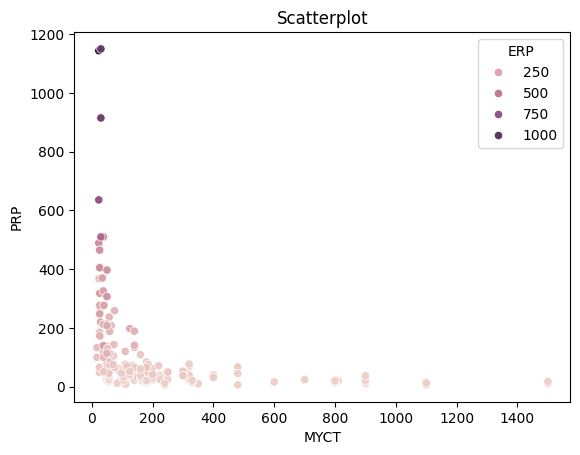

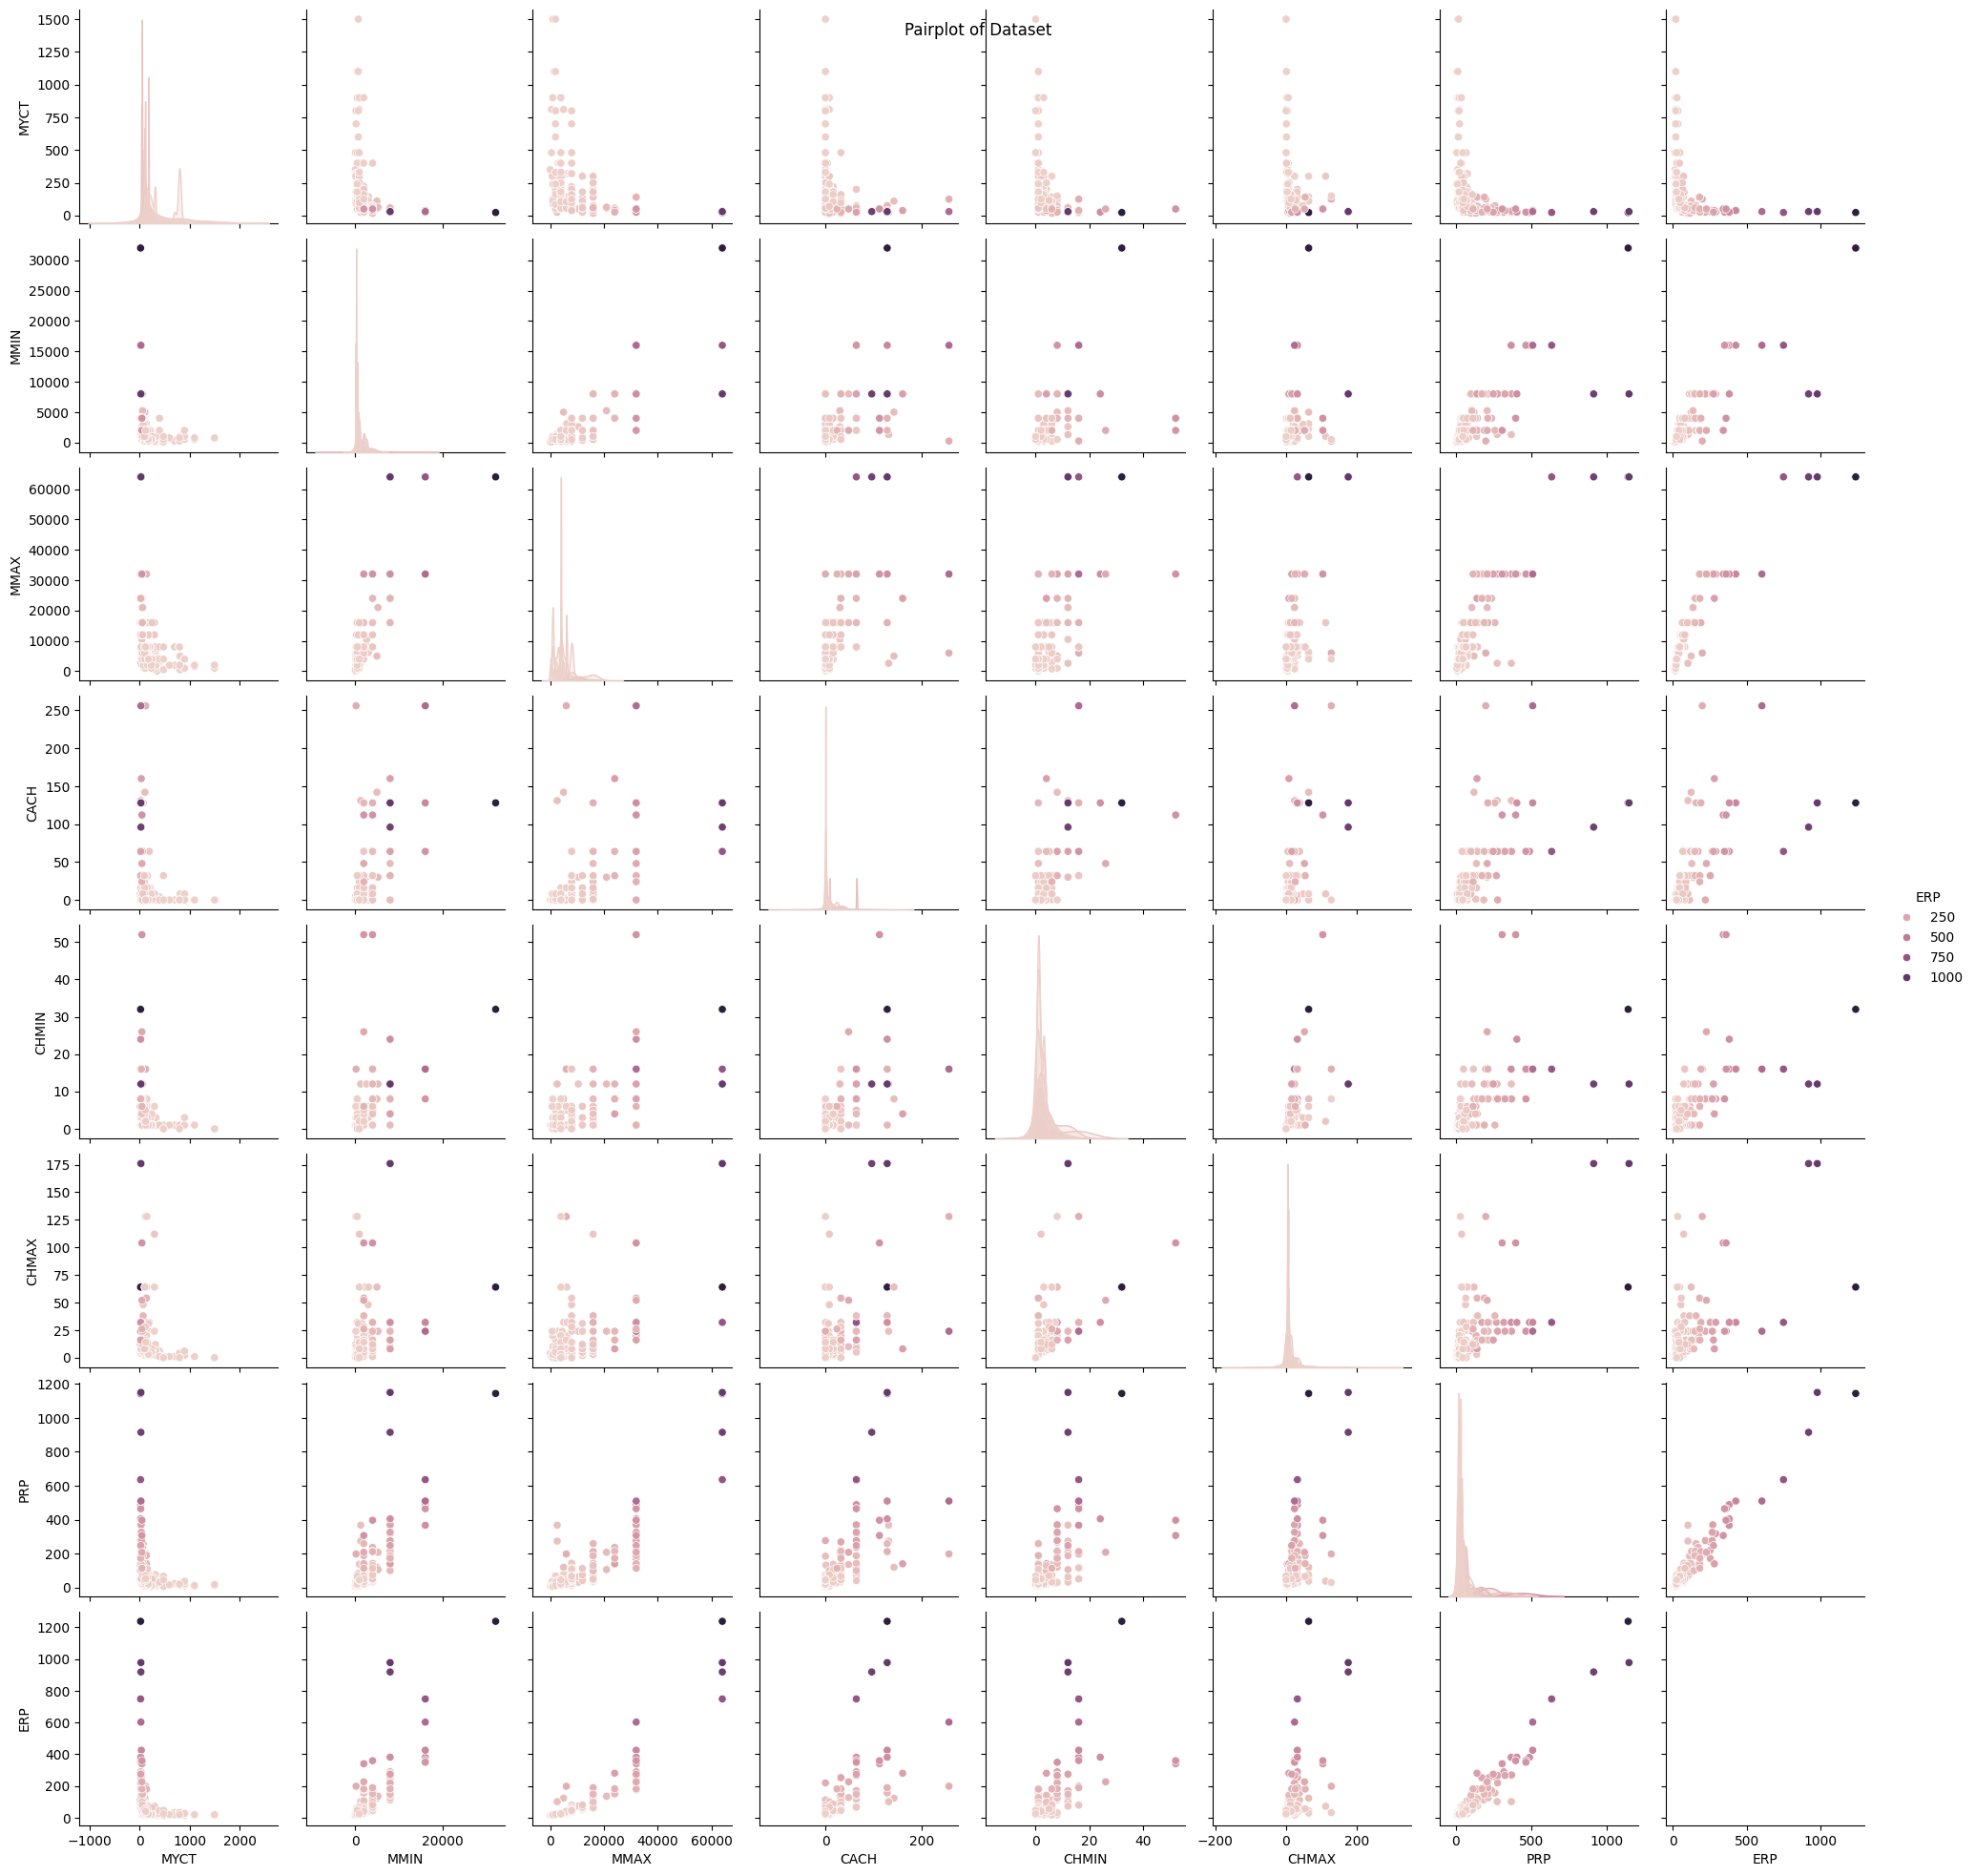

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



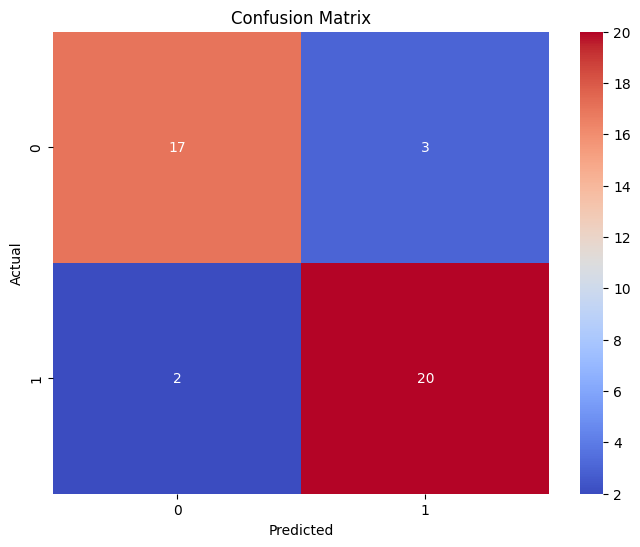

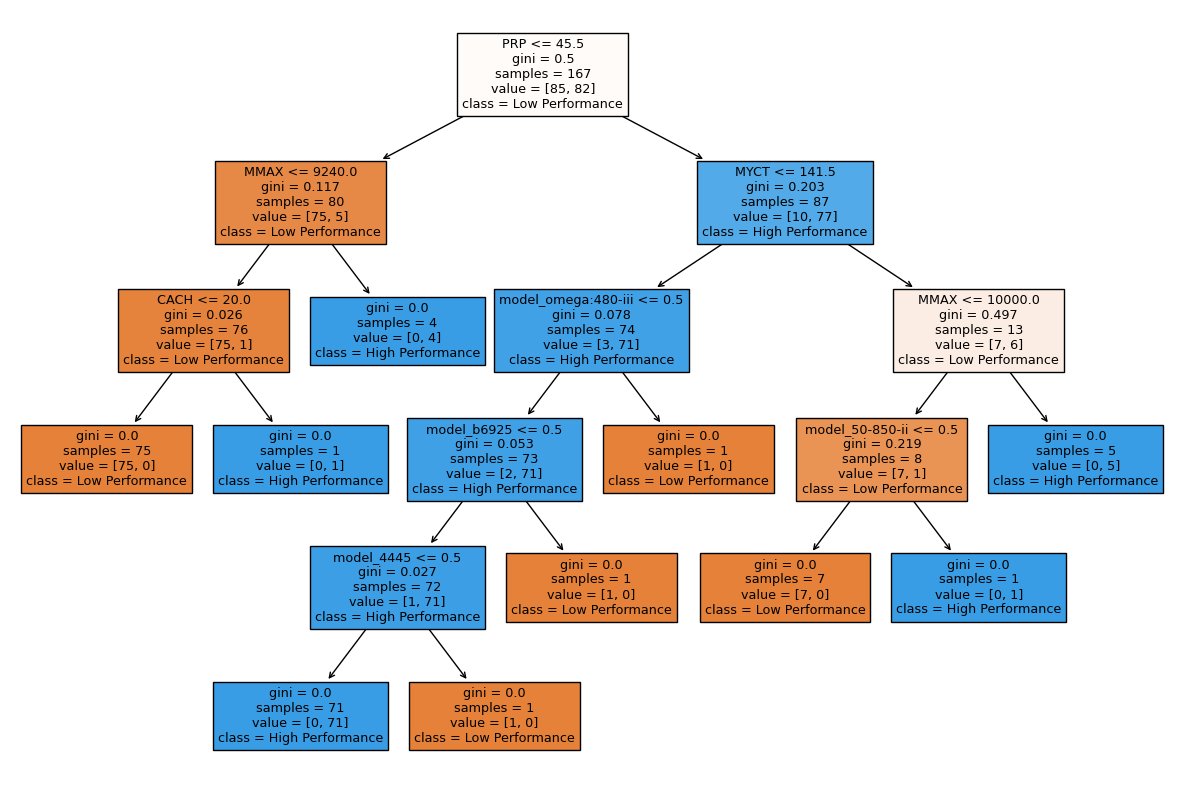

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

ch = 'machine.data'
columns = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df = pd.read_csv(ch, names=columns)

print(df.isnull().sum())

sns.scatterplot(x='MYCT', y='PRP', hue='ERP', data=df)
plt.title('Scatterplot')
plt.show()

sns.pairplot(df, vars=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'], hue='ERP')
plt.suptitle('Pairplot of Dataset')
plt.show()

df = pd.get_dummies(df, columns=['vendor', 'model'])

X = df.drop(['ERP'], axis=1)
y = df['ERP']

y = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low Performance', 'High Performance'])
plt.show()